In [46]:
# Import Required Libraries
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [47]:
# Read CSV File
df = pd.read_csv('../data/heart_disease.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,63,1,1,145,233,1,2,150,0,2.3,downsloping,0.0,6.0,0
1,1,67,1,4,160,286,0,2,108,1,1.5,flat,3.0,3.0,2
2,2,67,1,4,120,229,0,2,129,1,2.6,flat,2.0,7.0,1
3,3,37,1,3,130,250,0,0,187,0,3.5,downsloping,0.0,3.0,0
4,4,41,0,2,130,204,0,2,172,0,1.4,upsloping,0.0,3.0,0


In [48]:
# Handle Missing Values
print(f'Shape Of DataFrame: {df.shape}\n=================================')
print(f'Null Values In Each Column: \n\n{df.isnull().sum()}\n=================================')
print(f'Duplicate Values: {df.duplicated().sum()}')

Shape Of DataFrame: (303, 15)
Null Values In Each Column: 

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
num           0
dtype: int64
Duplicate Values: 0


In [49]:
# Handle Missing Values
old = df.shape[0]
print(f'No.of Rows Before Drop Missing & Duplicate Values: {old}\n')

df.dropna(axis=0, inplace=True)
df = df.drop_duplicates()

new = df.shape[0]
print(f'No.of Rows After Drop Missing & Duplicate Values: {new}\n')

print(f'No.of Deleted Rows: {old - new}')

No.of Rows Before Drop Missing & Duplicate Values: 303

No.of Rows After Drop Missing & Duplicate Values: 297

No.of Deleted Rows: 6


In [50]:
# Making One Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
one_encoded_data = onehot_encoder.fit_transform(df[['slope']])

one_encoded_df = pd.DataFrame(
  one_encoded_data,
  columns=onehot_encoder.get_feature_names_out(['slope'])
)

In [51]:
# Remove Old Data And Concatenate New Data
df.drop('slope', axis=1, inplace=True)

df = pd.concat([df.reset_index(drop=True), one_encoded_df.reset_index(drop=True)], axis=1)

df.drop('Unnamed: 0', axis=1, inplace=True)

In [52]:
# Making Sure Of Encoding Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                297 non-null    int64  
 1   sex                297 non-null    int64  
 2   cp                 297 non-null    int64  
 3   trestbps           297 non-null    int64  
 4   chol               297 non-null    int64  
 5   fbs                297 non-null    int64  
 6   restecg            297 non-null    int64  
 7   thalach            297 non-null    int64  
 8   exang              297 non-null    int64  
 9   oldpeak            297 non-null    float64
 10  ca                 297 non-null    float64
 11  thal               297 non-null    float64
 12  num                297 non-null    int64  
 13  slope_downsloping  297 non-null    float64
 14  slope_flat         297 non-null    float64
 15  slope_upsloping    297 non-null    float64
dtypes: float64(6), int64(10)
m

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,num,slope_downsloping,slope_flat,slope_upsloping
0,63,1,1,145,233,1,2,150,0,2.3,0.0,6.0,0,1.0,0.0,0.0
1,67,1,4,160,286,0,2,108,1,1.5,3.0,3.0,2,0.0,1.0,0.0
2,67,1,4,120,229,0,2,129,1,2.6,2.0,7.0,1,0.0,1.0,0.0
3,37,1,3,130,250,0,0,187,0,3.5,0.0,3.0,0,1.0,0.0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,0.0,3.0,0,0.0,0.0,1.0


In [54]:
# Making Standard Scaler
scaler = MinMaxScaler()
scaled_data = ['age', 'trestbps', 'chol', 'thalach']

df[scaled_data] = scaler.fit_transform(df[scaled_data])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,num,slope_downsloping,slope_flat,slope_upsloping
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0,2.3,0.0,6.0,0,1.0,0.0,0.0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,1,1.5,3.0,3.0,2,0.0,1.0,0.0
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,1,2.6,2.0,7.0,1,0.0,1.0,0.0
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,3.5,0.0,3.0,0,1.0,0.0,0.0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,1.4,0.0,3.0,0,0.0,0.0,1.0


In [55]:
df['num'].value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [56]:
x = df.drop('num', axis=1)
y = df['num']

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(x, y)
print("Before:", Counter(y))
print("After:", Counter(y_resampled))

df = pd.concat([X_resampled, y_resampled], axis=1)

Before: Counter({0: 160, 1: 54, 2: 35, 3: 35, 4: 13})
After: Counter({0: 160, 2: 160, 1: 160, 3: 160, 4: 160})


#### **Exploratory Data Analysis (EDA)**

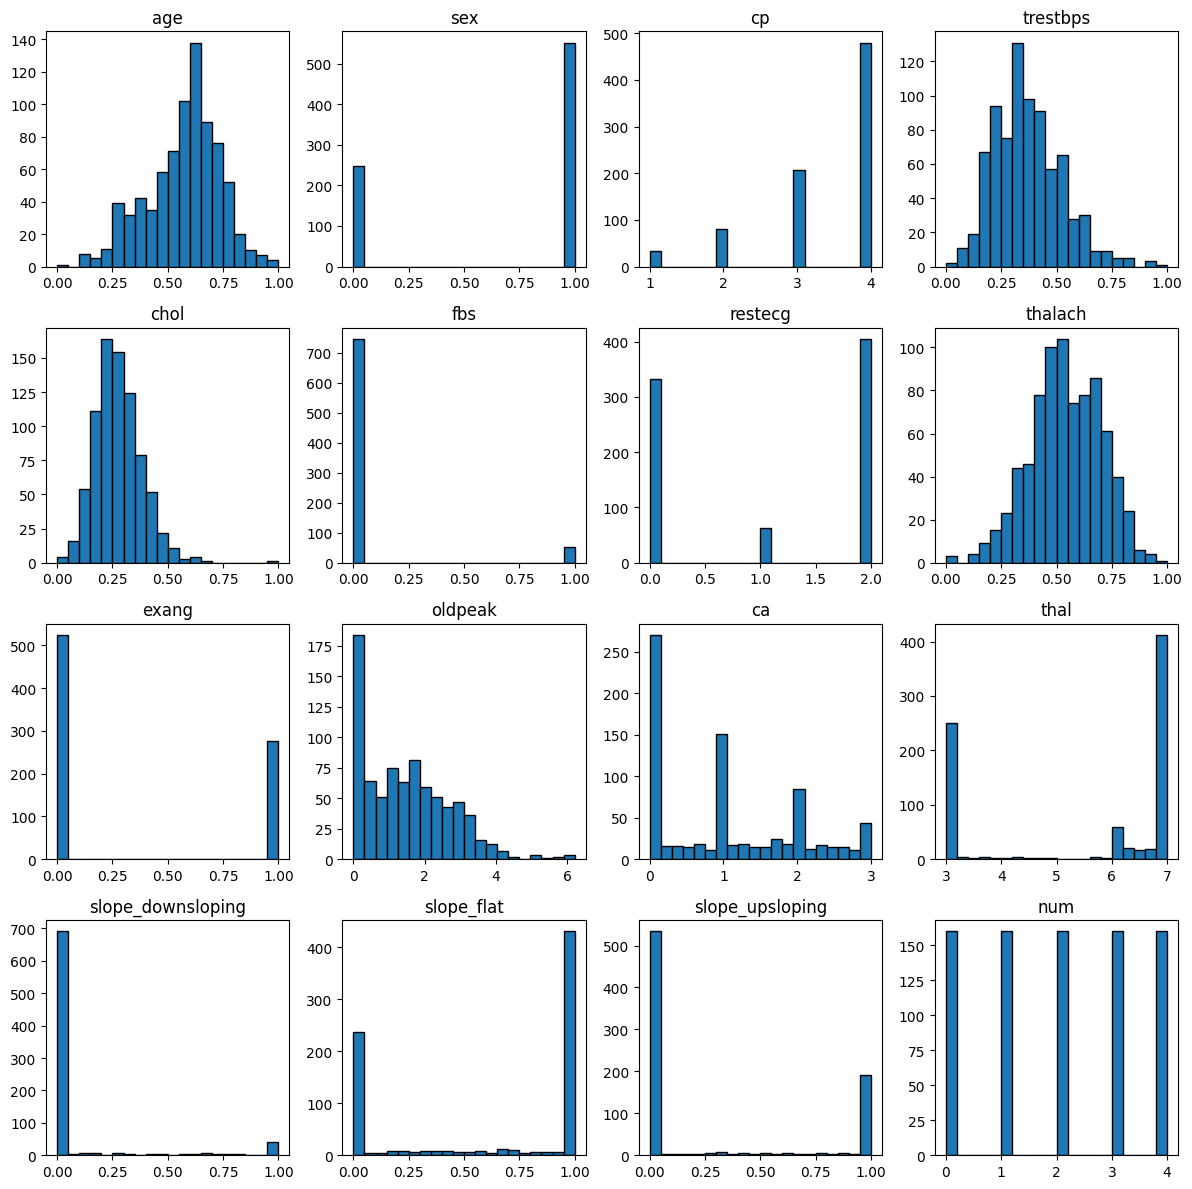

In [57]:
# Histogram Plot
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[col], bins=20, edgecolor="black")
    plt.title(col)

plt.tight_layout()
plt.show()

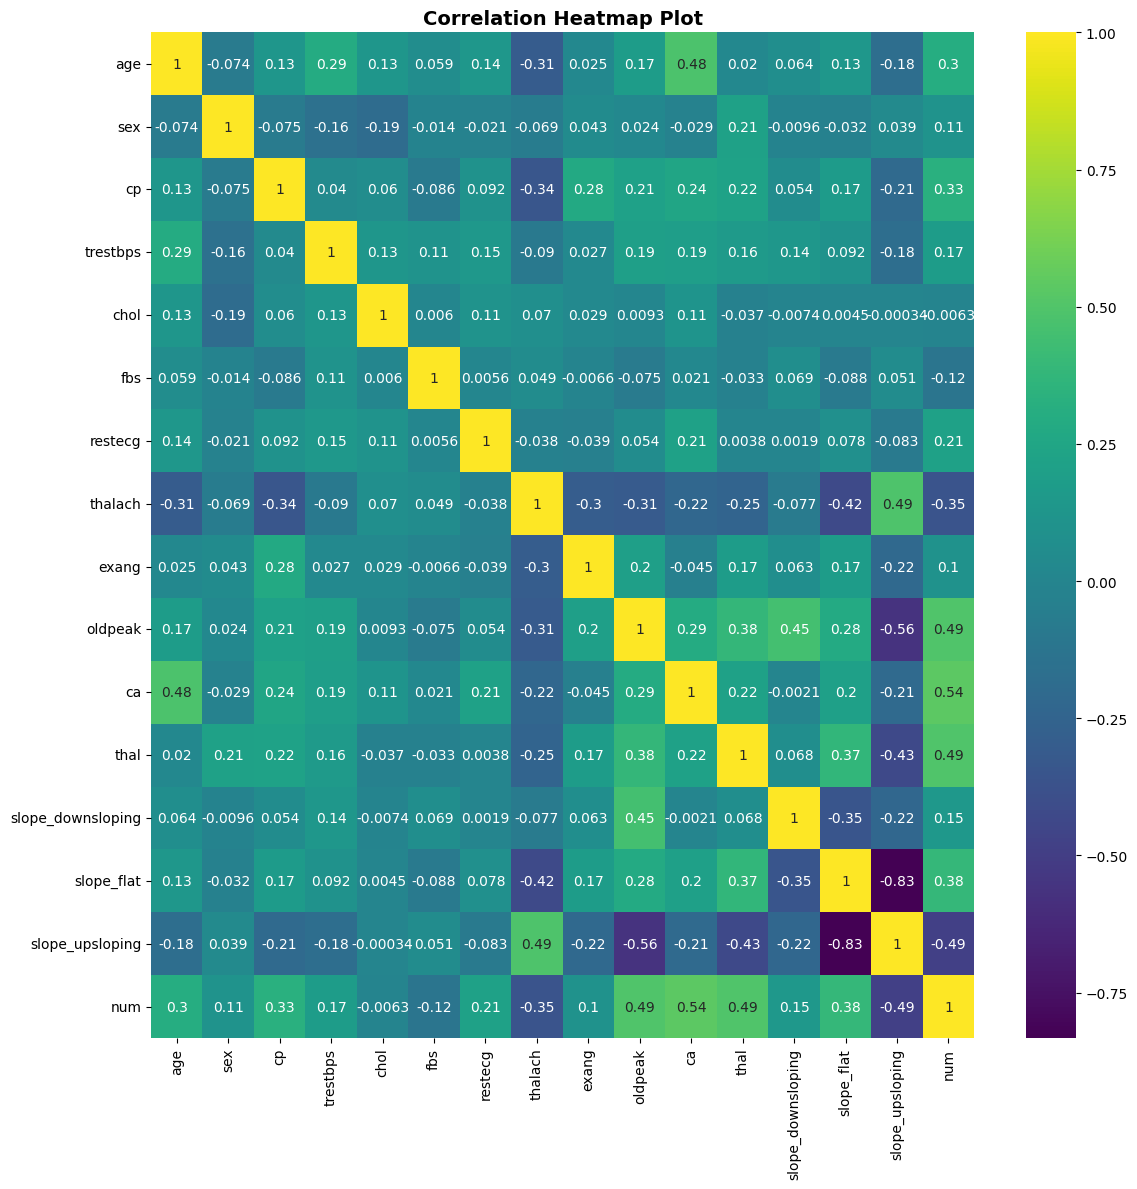

In [58]:
# Correlation Heatmap
plt.figure(figsize=(12, 12))
plt.title('Correlation Heatmap Plot', fontsize=14, fontweight='bold')
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

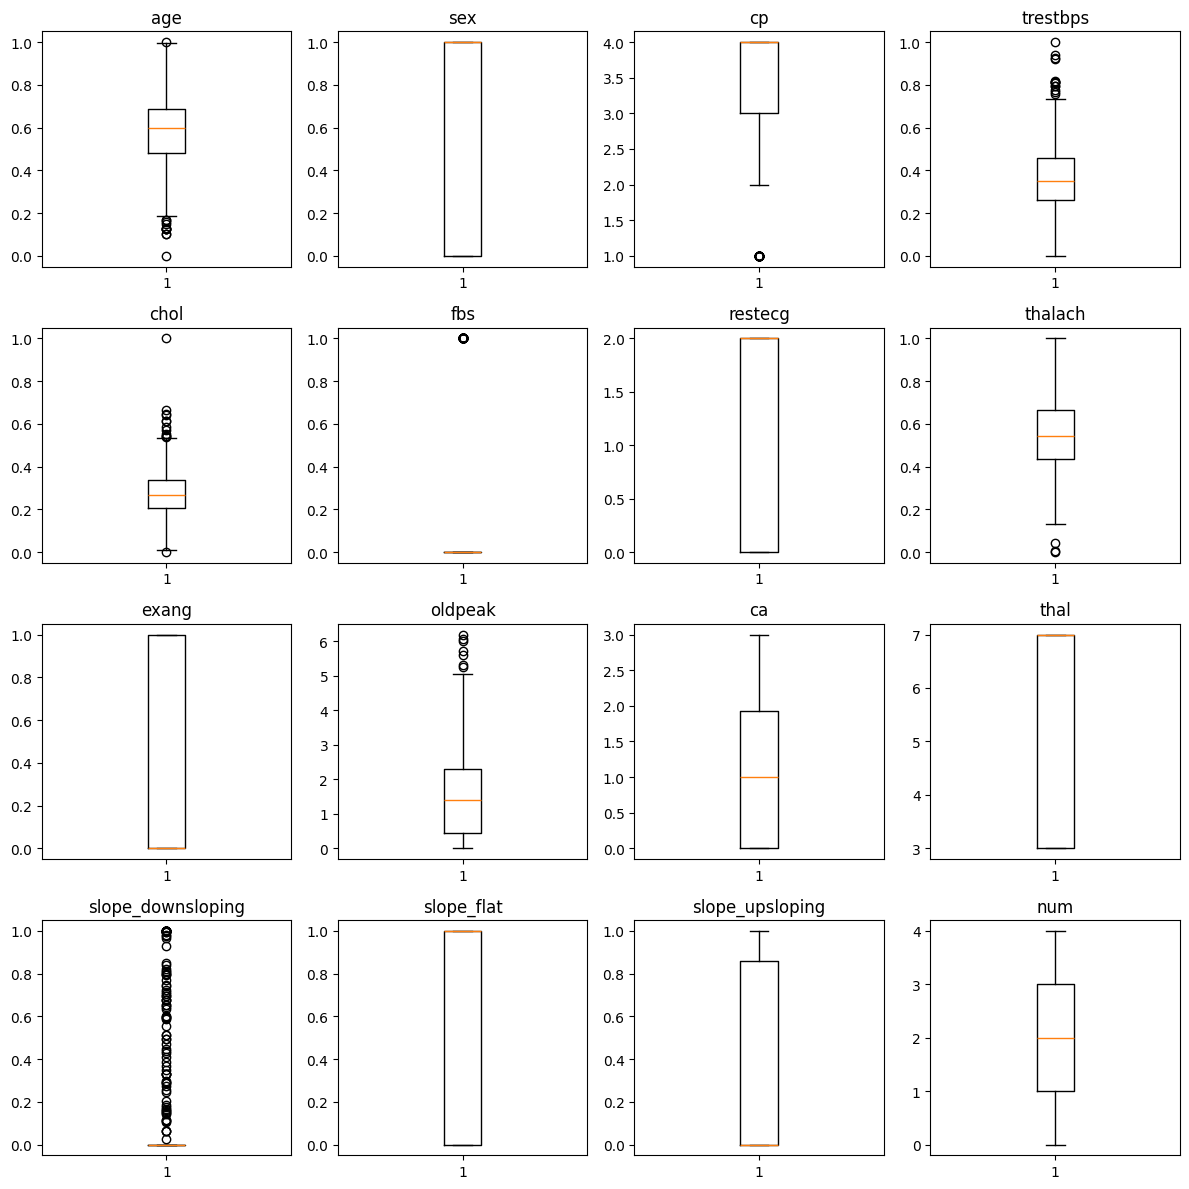

In [59]:
# Box Plot
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [60]:
df.to_csv('../data/cleaned_heart_disease.csv', index=False)